Shape of the data: (64, 1024)
Data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


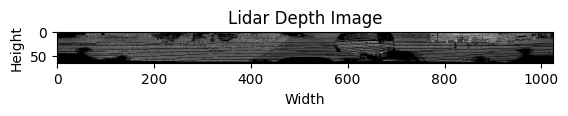

In [4]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Load the numpy file
file_path = "/DATA2/Vivek/Data/Downstream Task/Val/val_lidar_intensity/03_000186.npy"
data = np.load(file_path)

# Display the values
print("Shape of the data:", data.shape)
print("Data:")
print(data)



# Plot the data as an image
plt.imshow(data, cmap='gray')
plt.title('Lidar Depth Image')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

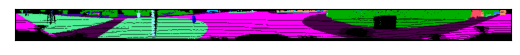

In [41]:
import numpy as np
import matplotlib.pyplot as plt

learning_map = {
    0: 0,     # "unlabeled"
    1: 0,     # "outlier" mapped to "unlabeled"
    10: 1,    # "car"
    11: 2,    # "bicycle"
    13: 5,    # "bus" mapped to "other-vehicle"
    15: 3,    # "motorcycle"
    16: 5,    # "on-rails" mapped to "other-vehicle"
    18: 4,    # "truck"
    20: 5,    # "other-vehicle"
    30: 6,    # "person"
    31: 7,    # "bicyclist"
    32: 8,    # "motorcyclist"
    40: 9,    # "road"
    44: 10,   # "parking"
    48: 11,   # "sidewalk"
    49: 12,   # "other-ground"
    50: 13,   # "building"
    51: 14,   # "fence"
    52: 0,    # "other-structure" mapped to "unlabeled"
    60: 9,    # "lane-marking" to "road"
    70: 15,   # "vegetation"
    71: 16,   # "trunk"
    72: 17,   # "terrain"
    80: 18,   # "pole"
    81: 19,   # "traffic-sign"
    99: 0,    # "other-object" to "unlabeled"
    252: 1,   # "moving-car" to "car"
    253: 7,   # "moving-bicyclist" to "bicyclist"
    254: 6,   # "moving-person" to "person"
    255: 8,   # "moving-motorcyclist" to "motorcyclist"
    256: 5,   # "moving-on-rails" mapped to "other-vehicle"
    257: 5,   # "moving-bus" mapped to "other-vehicle"
    258: 4,   # "moving-truck" to "truck"
    259: 5    # "moving-other-vehicle" to "other-vehicle"
}

# Define the inverse mapping dictionary
learning_map_inv = {
    0: 1,     # "unlabeled"
    1: 10,     # "outlier" mapped to "unlabeled"
    10: 1,    # "car"
    11: 2,    # "bicycle"
    13: 5,    # "bus" mapped to "other-vehicle"
    15: 3,    # "motorcycle"
    16: 5,    # "on-rails" mapped to "other-vehicle"
    18: 4,    # "truck"
    20: 5,    # "other-vehicle"
    30: 6,    # "person"
    31: 7,    # "bicyclist"
    32: 8,    # "motorcyclist"
    40: 9,    # "road"
    44: 10,   # "parking"
    48: 11,   # "sidewalk"
    49: 12,   # "other-ground"
    50: 13,   # "building"
    51: 14,   # "fence"
    52: 0,    # "other-structure" mapped to "unlabeled"
    60: 9,    # "lane-marking" to "road"
    70: 15,   # "vegetation"
    71: 16,   # "trunk"
    72: 17,   # "terrain"
    80: 18,   # "pole"
    81: 19,   # "traffic-sign"
    99: 0,    # "other-object" to "unlabeled"
    252: 1,   # "moving-car" to "car"
    253: 7,   # "moving-bicyclist" to "bicyclist"
    254: 6,   # "moving-person" to "person"
    255: 8,   # "moving-motorcyclist" to "motorcyclist"
    256: 5,   # "moving-on-rails" mapped to "other-vehicle"
    257: 5,   # "moving-bus" mapped to "other-vehicle"
    258: 4,   # "moving-truck" to "truck"
    259: 5    # "moving-other-vehicle" to "other-vehicle"
}

# Define the color mapping dictionary
color_map = {
    0: [0, 0, 0],
    1: [0, 0, 255],
    10: [245, 150, 100],
    11: [245, 230, 100],
    13: [250, 80, 100],
    15: [150, 60, 30],
    16: [255, 0, 0],
    18: [180, 30, 80],
    20: [255, 0, 0],
    30: [30, 30, 255],
    31: [200, 40, 255],
    32: [90, 30, 150],
    40: [255, 0, 255],
    44: [255, 150, 255],
    48: [75, 0, 75],
    49: [75, 0, 175],
    50: [0, 200, 255],
    51: [50, 120, 255],
    52: [0, 150, 255],
    60: [170, 255, 150],
    70: [0, 175, 0],
    71: [0, 60, 135],
    72: [80, 240, 150],
    80: [150, 240, 255],
    81: [0, 0, 255],
    99: [255, 255, 50],
    252: [245, 150, 100],
    256: [255, 0, 0],
    253: [200, 40, 255],
    254: [30, 30, 255],
    255: [90, 30, 150],
    257: [250, 80, 100],
    258: [180, 30, 80],
    259: [255, 0, 0]
}

# Load the NumPy file
file_path = '/DATA2/Vivek/Data/Downstream Task/Val/label_test_lidar/06_000447.npy'
data = np.load(file_path)

# Define inverse mapping function (assuming keys are unique)
def inverse_map(val):
  for key, value in learning_map.items():
    if value == val:
      return key
  return 0  # Assign unlabeled value if not found

# Apply inverse mapping to the data
data_mapped = np.vectorize(inverse_map)(data)

# Create color image based on color map
color_image = np.empty((data.shape[0], data.shape[1], 3), dtype=np.uint8)
for i in range(data_mapped.shape[0]):
  for j in range(data_mapped.shape[1]):
    color_image[i, j] = color_map[data_mapped[i, j]]

# Display the color image without ticks and border
plt.imshow(color_image, extent=(0, data.shape[1], 0, data.shape[0]))  # Set extent
plt.xticks([])
plt.yticks([])
plt.show()

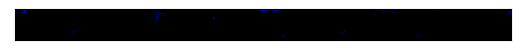

In [24]:
import numpy as np
import matplotlib.pyplot as plt

learning_map = {
    0: 1,     # "unlabeled"
    1: 1,     # "outlier" mapped to "unlabeled"
    10: 1,    # "car"
    11: 2,    # "bicycle"
    13: 5,    # "bus" mapped to "other-vehicle"
    15: 3,    # "motorcycle"
    16: 5,    # "on-rails" mapped to "other-vehicle"
    18: 4,    # "truck"
    20: 5,    # "other-vehicle"
    30: 6,    # "person"
    31: 7,    # "bicyclist"
    32: 8,    # "motorcyclist"
    40: 9,    # "road"
    44: 10,   # "parking"
    48: 11,   # "sidewalk"
    49: 12,   # "other-ground"
    50: 13,   # "building"
    51: 14,   # "fence"
    52: 0,    # "other-structure" mapped to "unlabeled"
    60: 9,    # "lane-marking" to "road"
    70: 15,   # "vegetation"
    71: 16,   # "trunk"
    72: 17,   # "terrain"
    80: 18,   # "pole"
    81: 19,   # "traffic-sign"
    99: 0,    # "other-object" to "unlabeled"
    252: 1,   # "moving-car" to "car"
    253: 7,   # "moving-bicyclist" to "bicyclist"
    254: 6,   # "moving-person" to "person"
    255: 8,   # "moving-motorcyclist" to "motorcyclist"
    256: 5,   # "moving-on-rails" mapped to "other-vehicle"
    257: 5,   # "moving-bus" mapped to "other-vehicle"
    258: 4,   # "moving-truck" to "truck"
    259: 5    # "moving-other-vehicle" to "other-vehicle"
}

# Define the color mapping dictionary
color_map = {
    0: [0, 0, 0],
    1: [0, 0, 255],
}

# Load the NumPy file
file_path = '/DATA2/Vivek/Data/Downstream Task/Val/test_val_lidar_label/08_000653.npy'
data = np.load(file_path)

# Filter out values other than 9
filtered_data = np.where(data == 1, data, 0)

# Create color image based on color map
color_image = np.empty((data.shape[0], data.shape[1], 3), dtype=np.uint8)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        try:
            color_image[i, j] = color_map[filtered_data[i, j]]
        except KeyError:
            color_image[i, j] = [255, 255, 255]  # Default color for unknown value

# Display the color image without ticks and border
plt.imshow(color_image, extent=(0, data.shape[1], 0, data.shape[0]))  # Set extent
plt.xticks([])
plt.yticks([])
plt.show()


In [37]:
#Checking the float and long operation on label tensor 

import numpy as np
import torch

# Load the label file
label_file_path = "/DATA2/Vivek/Data/Downstream Task/Train/train_lidar_depth/05_000432.npy"
semantic_image = np.load(label_file_path)

# Display the unique values before conversion
print("Semantic Image (Before Conversion):")
print(np.unique(semantic_image))

# Convert the label image to a PyTorch tensor and to long data type
semantic_tensor = torch.from_numpy(semantic_image).float()

# Display the unique values after conversion
print("\nSemantic Tensor (After Conversion):")
print(torch.unique(semantic_tensor))

Semantic Image (Before Conversion):
[ 0.          1.40660121  1.42535446 ... 79.61956951 79.64340308
 79.8028771 ]

Semantic Tensor (After Conversion):
tensor([ 0.0000,  1.4066,  1.4254,  ..., 79.6196, 79.6434, 79.8029])


In [40]:
import numpy as np

# Load the numpy file
file_path = '/DATA2/Vivek/Data/Downstream Task/Val/label_test_lidar/08_000653.npy'
data = np.load(file_path)

# Find the unique values
unique_values = np.unique(data)

# Print the unique values
print("Unique values of the loaded numpy file:", unique_values)


Unique values of the loaded numpy file: [ 0.  9. 11. 13. 14. 15. 17. 18.]


In [37]:
import numpy as np

# Load the numpy file
file_path ='/DATA2/Vivek/Data/Downstream Task/Val/label_test_lidar/08_000653.npy'
data = np.load(file_path)

# Find the unique values and their counts
unique_values, counts = np.unique(data, return_counts=True)

# Print the unique values and their counts
print("Unique values of the loaded numpy file and their counts:")
for value, count in zip(unique_values, counts):
    print(f"Label: {value}, Points: {count}")


Unique values of the loaded numpy file and their counts:
Label: 0.0, Points: 22240
Label: 9.0, Points: 7356
Label: 11.0, Points: 9725
Label: 13.0, Points: 5129
Label: 14.0, Points: 31
Label: 15.0, Points: 13954
Label: 17.0, Points: 6982
Label: 18.0, Points: 119


In [21]:
import numpy as np

# Load the numpy file
file_path = "/DATA2/Vivek/Data/Downstream Task/Train/train_lidar_depth/05_000432.npy"
data = np.load(file_path)

# Display the shape of the data
print("Shape of the data:", data.shape)

# Display each element of the data
print("Data:")
for row in data:
    for element in row:
        print(element, end=' ')
    print()


Shape of the data: (64, 1024)
Data:
0.0 0.0 0.0 0.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 0.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 0.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 0.0 0.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 0.0 0.0 0.0 0.0 0.0 15.0 0.0 15.0 15.0 0.0 0.0 0.0 0.0 15.0 15.0 15.0 15.0 0.0 15.0 15.0 15.0 0.0 0.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 13.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 13.0 15.0 15.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 